In [167]:
import numpy as np
import matplotlib.pyplot as plt
import logging

# Import the JY_Toolkit that complete by my hands
import os,sys
parentdir = os.path.dirname(os.path.abspath('.'))
temp_path = os.path.join(parentdir,'JY_Toolkit')
sys.path.insert(0,temp_path)
import JY_Toolkit



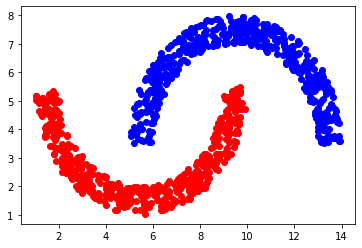

In [168]:
JY_Toolkit.Jy_makeDataset.random_state(5228)

X,y = JY_Toolkit.Jy_makeDataset.draw_HalfMoon(n_sample=1000,ver_distance=-2,slope=0)

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
# X
p_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 1]
p_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 1]
n_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == -1]
n_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == -1]

plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()

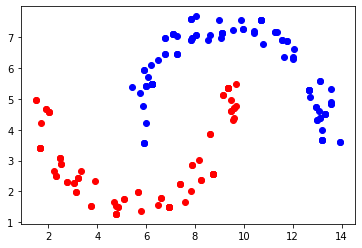

In [169]:
X_train,X_valid,y_train,y_valid = JY_Toolkit.Jy_dataSetProcess.Jy_train_test_split(X,y)

p_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == 1]
p_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == 1]
n_point_x1 = [ X_valid[i,0] for i in range(len(X_valid)) if y_valid[i] == -1]
n_point_x2 = [ X_valid[i,1] for i in range(len(X_valid)) if y_valid[i] == -1]

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plt.show()


0.798 202
0.798 202
0.798 202
0.7989999999999999 201
0.7989999999999999 201
0.7989999999999999 201
0.7989999999999999 201
0.8 200
0.8 200
0.8 200
0.8009999999999999 199
0.8009999999999999 199
0.8029999999999999 197
0.8029999999999999 197
0.8029999999999999 197
0.8029999999999999 197
0.8029999999999999 197
0.8029999999999999 197
0.804 196
0.804 196
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.8049999999999999 195
0.806 194
0.8069999999999999 193
0.8069999999999999 193
0.8069999999999999 193
0.8069999999999999 193
0.8069999999999999 193
0.808 192
0.808 192
0.808 192
0.808 192
0.808 192
0.8089999999999999 191
0.8089999999999999 191
0.8089999999999999 191
0.81 190
0.81 190
0.8109999999999999 189
0.8109999999999999 1

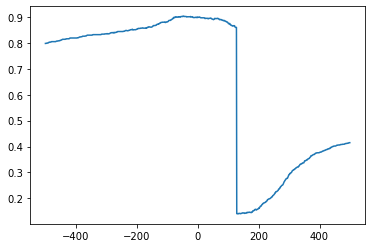

In [170]:
width_ = 500
score = []
max_value = 0
max_index = 0
for Lambda in range(-width_,width_):
    temp = np.ones(len(X))      # 生成全1列，用于增广
    new_X_train = np.column_stack((X, temp))    # 增广在设计矩阵 X，使其维数增加。使 X的维度为： N x 2 -> N x 3
    R_xx = -1 * np.dot(new_X_train.T,new_X_train)    # 计算自相关矩阵

    Regular = np.eye(R_xx.shape[0])     # 生成单位阵
    # print(Regular)
    R_xx += Regular * Lambda            # 自相关矩阵加上正则项

    R_xx_inv = np.linalg.inv(R_xx)      # 对加上正则项的矩阵求逆
    res_w = np.dot(-1 * R_xx_inv,-1 * np.dot(new_X_train.T,y))  # 运用公式(8) 算出结果
    # res_w

    pre = np.dot(new_X_train,res_w) 

    p_point_x1 = [ X[i,0] for i in range(len(X)) if pre[i]*y[i] >= 0]
    p_point_x2 = [ X[i,1] for i in range(len(X)) if pre[i]*y[i] >= 0]
    n_point_x1 = [ X[i,0] for i in range(len(X)) if pre[i]*y[i]  < 0]
    n_point_x2 = [ X[i,1] for i in range(len(X)) if pre[i]*y[i]  < 0]

    # max_value = max(1-len(p_point_x1)/len(X),max_value)
    if 1-len(p_point_x1)/len(X) >= max_value:
        max_index = Lambda
        max_value = 1-len(p_point_x1)/len(X)

    score.append(1-len(p_point_x1)/len(X))
    print(1-len(p_point_x1)/len(X),len(p_point_x1))

fig = plt.figure(num = 'score by lambda')
plot_1 = fig.add_subplot(111)
plot_1.plot(range(-width_,width_),score)
print(f'best Lambda : {max_index},max_score {max_value}')

In [171]:
temp = np.ones(len(X))      # 生成全1列，用于增广
new_X_train = np.column_stack((X, temp))    # 增广在设计矩阵 X，使其维数增加。使 X的维度为： N x 2 -> N x 3
R_xx = -1 * np.dot(new_X_train.T,new_X_train)    # 计算自相关矩阵

Regular = np.eye(R_xx.shape[0])     # 生成单位阵
# print(Regular)
R_xx += Regular * max_index            # 自相关矩阵加上正则项

R_xx_inv = np.linalg.inv(R_xx)      # 对加上正则项的矩阵求逆
res_w = np.dot(-1 * R_xx_inv,-1 * np.dot(new_X_train.T,y))  # 运用公式(8) 算出结果
# res_w

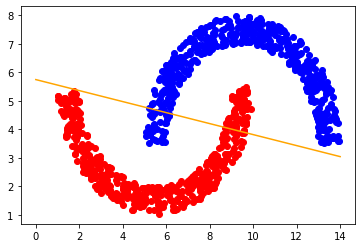

In [172]:
p_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == 1]
p_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == 1]
n_point_x1 = [ X[i,0] for i in range(len(X)) if y[i] == -1]
n_point_x2 = [ X[i,1] for i in range(len(X)) if y[i] == -1]

line_x = np.linspace(0,14,100)

line_k = -1*(res_w[0]/res_w[1])
line_b = -1*(float(res_w[2])/res_w[1])

# line_y = list(map(lambda x : x*line_k + line_b ,line_x))
# y = line_k * line_x + line_b
line_y = line_k * line_x + line_b
fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')

plot_1.plot(line_x,line_y,c = 'orange')

plt.show()


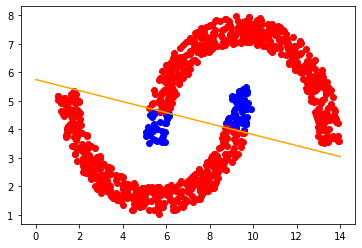

0.903 97


In [173]:
pre = np.dot(new_X_train,res_w) 

p_point_x1 = [ X[i,0] for i in range(len(X)) if pre[i]*y[i] >= 0]
p_point_x2 = [ X[i,1] for i in range(len(X)) if pre[i]*y[i] >= 0]
n_point_x1 = [ X[i,0] for i in range(len(X)) if pre[i]*y[i]  < 0]
n_point_x2 = [ X[i,1] for i in range(len(X)) if pre[i]*y[i]  < 0]

fig = plt.figure(num = 'X')
plot_1 = fig.add_subplot(111)
plot_1.scatter(p_point_x1,p_point_x2,color = 'blue')
plot_1.scatter(n_point_x1,n_point_x2,color = 'red')
plot_1.plot(line_x,line_y,c = 'orange')
plt.show()
print(1-len(p_point_x1)/len(X),len(p_point_x1))

删除

In [174]:
'''
# 增广 X
add = np.ones(len(X))
X = np.column_stack((X, add))  # up X dimension
Rx = np.dot(X.T,X)
# 正则项
Regular = np.eye(3)
Rx += Regular * Lambda
# 求逆
Rx_inv = np.linalg.inv(Rx)
# 套公式算 w_map
w_map = np.dot(-1 * Rx_inv,-1 * np.dot(X.T,y))
w_map
'''

'\n# 增广 X\nadd = np.ones(len(X))\nX = np.column_stack((X, add))  # up X dimension\nRx = np.dot(X.T,X)\n# 正则项\nRegular = np.eye(3)\nRx += Regular * Lambda\n# 求逆\nRx_inv = np.linalg.inv(Rx)\n# 套公式算 w_map\nw_map = np.dot(-1 * Rx_inv,-1 * np.dot(X.T,y))\nw_map\n'